Test if L1 normalizing Largrange Multipliers improve SVM by reducing number of support vector
 
delicate dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from scipy.stats import bernoulli

from classification.classifier import SVM
from classification.optimizer import QpDuel
from datageneration import data_generation


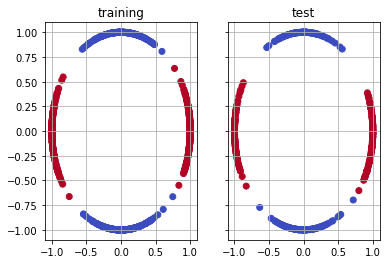

In [2]:
dim = 2
num_train = 2**10
num_test = 2**9
C = 0.01
dist = 1
cent = .05

X1, y1 = data_generation(dim, int(np.ceil(num_train/4)), 1, mean=np.array([dist, 0]), cov=cent*np.eye(dim))
X2, y2 = data_generation(dim, int(np.ceil(num_train/4)), 1, mean=np.array([-dist, 0]), cov=cent*np.eye(dim))
X3, y3 = data_generation(dim, int(np.ceil(num_train/4)), -1, mean=np.array([0, dist]), cov=cent*np.eye(dim))
X4, y4 = data_generation(dim, int(np.ceil(num_train/4)), -1, mean=np.array([0, -dist]), cov=cent*np.eye(dim))

X_train = np.vstack((X1, X2, X3, X4))
X_train = np.array([x/np.linalg.norm(x) for x in X_train])
y_train = np.hstack((y1, y2, y3, y4))

X5, y5 = data_generation(dim, int(np.ceil(num_test/4)), 1, mean=np.array([dist, 0]), cov=cent*np.eye(dim))
X6, y6 = data_generation(dim, int(np.ceil(num_test/4)), 1, mean=np.array([-dist, 0]), cov=cent*np.eye(dim))
X7, y7 = data_generation(dim, int(np.ceil(num_test/4)), -1, mean=np.array([0, dist]), cov=cent*np.eye(dim))
X8, y8 = data_generation(dim, int(np.ceil(num_test/4)), -1, mean=np.array([0, -dist]), cov=cent*np.eye(dim))

X_test = np.vstack((X5, X6, X7, X8))
X_test = np.array([x/np.linalg.norm(x) for x in X_test])
y_test = np.hstack((y5, y6, y7, y8))

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
ax = ax.flatten()
data = [X_train, X_test]
label = [y_train, y_test]
subtitle = ['training','test']
for i in range(len(ax)):
    ax[i].scatter(data[i][:,0], data[i][:,1], c=label[i], cmap=plt.cm.coolwarm)
    ax[i].grid()
    ax[i].set_title(subtitle[i])

In [3]:
cls_pw2 = SVM(X_train, y_train, kernel= 'power2', name='power2 kernel')
cls_pw2_n = SVM(X_train, y_train, kernel= 'power2', name='power2 kernel (normalized)')
cls_pw2.optimize(QpDuel, C=C, Probability=False)
cls_pw2_n.optimize(QpDuel, C=C, Probability=True)

     pcost       dcost       gap    pres   dres
 0: -1.0901e+01 -1.7030e+01  5e+03  7e+01  2e-15
 1: -1.4100e+00 -1.6902e+01  6e+01  6e-01  2e-15
 2: -1.2091e+00 -9.3170e+00  8e+00  3e-16  1e-15
 3: -1.3847e+00 -2.5510e+00  1e+00  7e-16  1e-15
 4: -1.5833e+00 -1.9443e+00  4e-01  5e-16  1e-15
 5: -1.6511e+00 -1.8072e+00  2e-01  8e-17  1e-15
 6: -1.6892e+00 -1.7425e+00  5e-02  6e-16  1e-15
 7: -1.6993e+00 -1.7263e+00  3e-02  1e-15  1e-15
 8: -1.7051e+00 -1.7173e+00  1e-02  1e-15  1e-15
 9: -1.7073e+00 -1.7139e+00  7e-03  1e-15  1e-15
10: -1.7089e+00 -1.7116e+00  3e-03  6e-16  1e-15
11: -1.7100e+00 -1.7102e+00  3e-04  7e-16  1e-15
12: -1.7101e+00 -1.7101e+00  2e-05  8e-17  1e-15
13: -1.7101e+00 -1.7101e+00  2e-07  2e-16  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.9192e-01 -1.1545e+01  2e+03  5e+01  1e-15
 1: -9.5403e-01 -1.1309e+01  7e+01  1e+00  2e-15
 2: -8.3166e-01 -7.3506e+00  7e+00  6e-16  2e-15
 3: -8.3974e-01 -1.6296e+00  8e-01  5e-16  1e-1

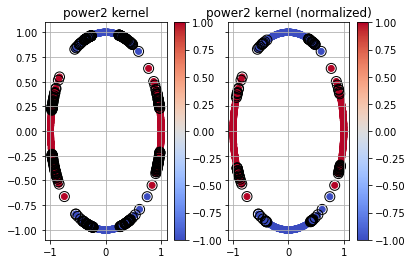

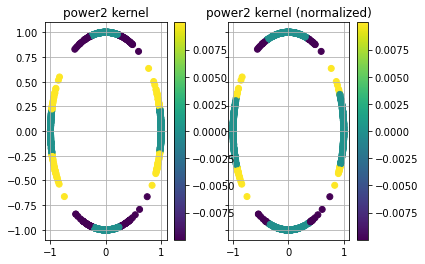

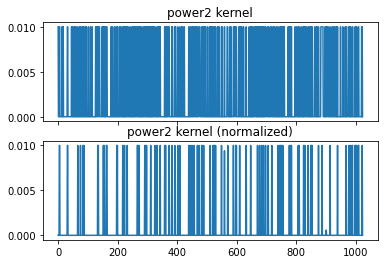

In [4]:
compare_linAndpower2_Normalized_sv, ax = plt.subplots(1, 2, sharex=True, sharey=True)
clses = [cls_pw2, cls_pw2_n]
ax=ax.flatten()
for i in range(len(ax)):
    clses[i].plot(ax[i], sv=True)

compare_linAndpower2_Normalized_, ax = plt.subplots(1, 2, sharex=True, sharey=True)
clses = [cls_pw2, cls_pw2_n]
ax=ax.flatten()
for i in range(len(ax)):
    clses[i].plot(ax[i], sv=False)

compare_linAndpower2_Normalized_alpha, ax = plt.subplots(2, 1, sharex=True, sharey=False)
clses = [cls_pw2, cls_pw2_n]
ax=ax.flatten()
for i in range(len(ax)):
    ax[i].plot(clses[i].alpha)
    ax[i].set_title(clses[i].name)

In [5]:
clses = [cls_pw2, cls_pw2_n]
test_label = [y_test, y_test]
for i in range(len(clses)):
    print('Performance of', clses[i].name, 'is', clses[i].check_perfomance(X_test, test_label[i]))

Performance of power2 kernel is 0.998046875
Performance of power2 kernel (normalized) is 1.0


In [6]:
from custom_qiskit.classification.classifier import SWAPclassifier, QMinicClassifier
from custom_qiskit.classification.optimizer import EqualWeight, QMimicSVM
from qiskit import BasicAer

backend = BasicAer.get_backend('qasm_simulator')
sc = QMinicClassifier(cls_pw2_n)
sc.optimize()
sc.check_perfomance(X_test, y_test, backend=backend)

QiskitError: 'Keyboard interrupt in parallel_map.'

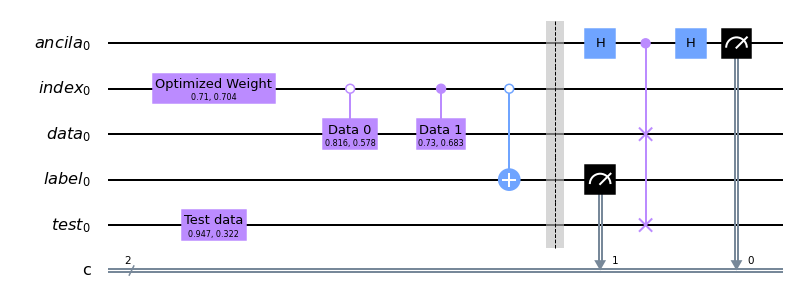

In [7]:
sc.classifier_circ[3].draw('mpl')

In [8]:
cls_pw2_n.support_vector

array([[0.81578002, 0.57836231],
       [0.7300009 , 0.68344618]])

In [9]:
from custom_qiskit.quantum_encoder import Encoder
from qiskit.circuit import QuantumCircuit, QuantumRegister

qc = QuantumCircuit(1)
qc.encode(np.sqrt(cls_pw2_n.alpha[cls_pw2_n.support_vector_index]), 0)
qc.draw()
state = np.sqrt(cls_pw2_n.alpha[cls_pw2_n.support_vector_index])
state = state/np.linalg.norm(state)
np.linalg.norm(state)

1.0